I am going to use LSTM, an artificial recurrent neural network to predict the closing price of an company's stock price using data from last 90 days.

In [45]:
!pip install -q yfinance
!pip install tensorflow
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


import data from yahoo

In [7]:
df = yf.download('TSLA', start='2017-01-01', end='2024-11-18')
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2017-01-03 00:00:00+00:00,14.466000,14.466000,14.688667,14.064000,14.324000,88849500
2017-01-04 00:00:00+00:00,15.132667,15.132667,15.200000,14.287333,14.316667,168202500
2017-01-05 00:00:00+00:00,15.116667,15.116667,15.165333,14.796667,15.094667,88675500
2017-01-06 00:00:00+00:00,15.267333,15.267333,15.354000,15.030000,15.128667,82918500
2017-01-09 00:00:00+00:00,15.418667,15.418667,15.461333,15.200000,15.264667,59692500
...,...,...,...,...,...,...
2024-11-11 00:00:00+00:00,350.000000,350.000000,358.640015,336.000000,346.299988,210521600
2024-11-12 00:00:00+00:00,328.489990,328.489990,345.839996,323.309998,342.739990,155726000


number of rows and columns

In [8]:
df.shape

(1982, 6)

In [9]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03
mean,137.160236,137.160236,140.217721,133.964260,137.186828,1.242315e+08
std,110.927495,110.927495,113.484857,108.330953,111.029044,7.715212e+07
min,11.931333,11.931333,12.445333,11.799333,12.073333,2.940180e+07
25%,21.783000,21.783000,22.107500,21.363667,21.696666,7.617870e+07
50%,147.318329,147.318329,150.886665,143.261665,147.558334,1.032990e+08
75%,233.939167,233.939167,238.484169,228.194996,233.839996,1.426049e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1982 entries, 2017-01-03 00:00:00+00:00 to 2024-11-15 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1982 non-null   float64
 1   (Close, TSLA)      1982 non-null   float64
 2   (High, TSLA)       1982 non-null   float64
 3   (Low, TSLA)        1982 non-null   float64
 4   (Open, TSLA)       1982 non-null   float64
 5   (Volume, TSLA)     1982 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.4 KB


plot closing price

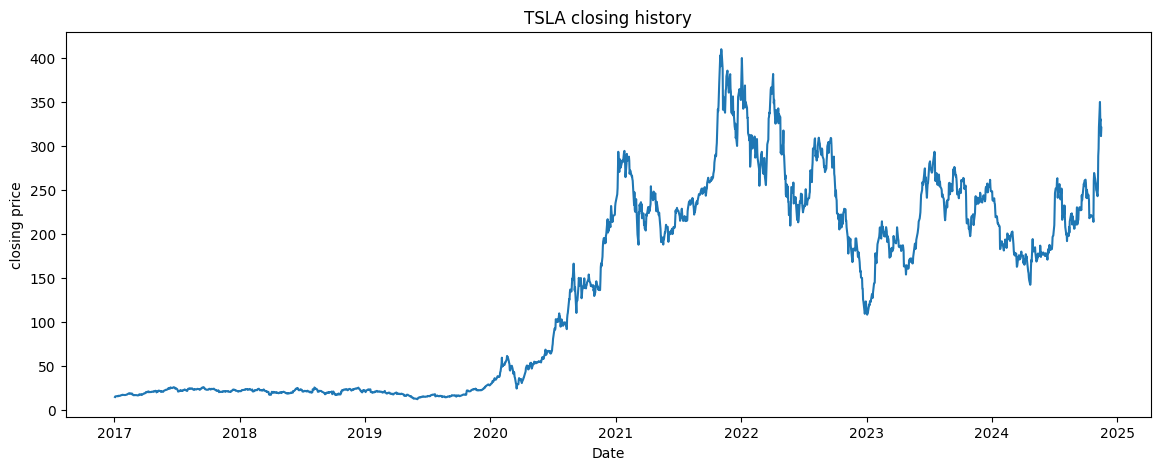

In [13]:
plt.figure(figsize=(14,5))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('closing price')
plt.title('TSLA closing history')
plt.show()

In [27]:
# only keeping close column
df2 = df['Close']
# covert it to numpy array
df3 =df2.values
# get training data length
trainingdf_length = math.ceil(len(df3)*.8)
trainingdf_length

1586

In [28]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df3)
scaled_df

array([[0.00636789],
       [0.00804277],
       [0.00800257],
       ...,
       [0.7996928 ],
       [0.75180801],
       [0.77577555]])

In [34]:
# creating train data set
train_df =scaled_df[0:trainingdf_length,:]
#splittting data into train and test
x_train = []
y_train = []

for i in range(90,trainingdf_length):
    x_train.append(train_df[i-90:i,0])
    y_train.append(train_df[i,0])
    if i<=90:
        print(x_train)
        print(y_train)
        print()


[array([0.00636789, 0.00804277, 0.00800257, 0.0083811 , 0.0087613 ,
       0.00852514, 0.00850169, 0.00847824, 0.00984494, 0.00948149,
       0.00994711, 0.01085155, 0.011014  , 0.01171578, 0.01266879,
       0.01264534, 0.01231706, 0.01239076, 0.01200219, 0.01221992,
       0.01176938, 0.01215628, 0.01211943, 0.01319805, 0.01314948,
       0.01391992, 0.01511244, 0.01511746, 0.0170218 , 0.01708544,
       0.01688111, 0.01507057, 0.01561992, 0.01648416, 0.01583431,
       0.01289992, 0.01306908, 0.01126524, 0.01189499, 0.01190002,
       0.01197706, 0.01215963, 0.01209933, 0.01166051, 0.01137243,
       0.01104248, 0.01083982, 0.01125519, 0.01323657, 0.01285638,
       0.0139149 , 0.01382278, 0.01389312, 0.01201056, 0.01273579,
       0.01269726, 0.01410081, 0.01528328, 0.01649421, 0.01648249,
       0.01657293, 0.01663658, 0.02002318, 0.02089077, 0.01943363,
       0.02005333, 0.02069648, 0.02234624, 0.02172989, 0.0197418 ,
       0.02094102, 0.02051225, 0.02031294, 0.0211956 , 0.0206

In [35]:
# convert x_train adn y_train to numpy array

x_train, y_train = np.array(x_train), np.array(y_train)


In [39]:
# reshaping data

x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1496, 90, 1)

In [68]:
# BuilDing the LSTM model
model =Sequential() 
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))          
model.add(Dense(1))
          

/Users/raghul/Desktop/pandas_project/raaghul/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
# compiling the model
model.compile(optimizer = 'adam',loss='mean_squared_error')

In [70]:
#training the model
model.fit(x_train,y_train,batch_size=1,epochs=1)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0056


In [75]:
# creating testing data set
test_df = scaled_df[trainingdf_length - 90:,:]
x_test = []
y_test = df3[trainingdf_length:,:]

for i in range(90, len(test_df)):
    x_test.append(test_df[i-90:i,0])


In [76]:
# reshaping the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [78]:
# getting predicted closing values
Answer = model.predict(x_test)
Answer = scaler.inverse_transform(Answer)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [85]:
# measuring RMSE
rmse = np.sqrt(np.mean(Answer - y_test)**2)
rmse
valid

Ticker,TSLA,Predicted values
Date,,
2023-04-24 00:00:00+00:00,162.550003,170.477386
2023-04-25 00:00:00+00:00,160.669998,166.858826
2023-04-26 00:00:00+00:00,153.750000,163.531067
2023-04-27 00:00:00+00:00,160.190002,159.870758
2023-04-28 00:00:00+00:00,164.309998,157.537735
...,...,...
2024-11-11 00:00:00+00:00,350.000000,266.937805
2024-11-12 00:00:00+00:00,328.489990,283.749481
2024-11-13 00:00:00+00:00,330.239990,295.976990


/var/folders/63/f458bmd11lxb90nqcxgfv6qw0000gn/T/ipykernel_68299/1209568940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted values'] = Answer


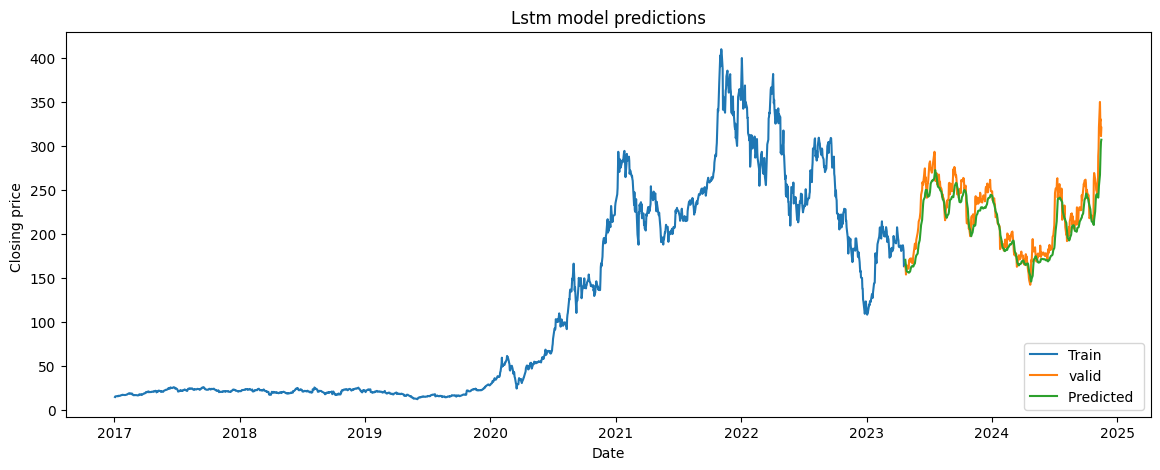

In [87]:
# Plotting the data

train = df2[:trainingdf_length]
valid = df2[trainingdf_length:]
valid['Predicted values'] = Answer 
plt.figure(figsize =(14,5))
plt.title('Lstm model predictions')
plt.xlabel('Date')
plt.ylabel('Closing price ')
plt.plot(train['TSLA'])
plt.plot(valid[['TSLA','Predicted values']])
plt.legend(['Train','valid','Predicted '],loc = 'lower right')
plt.show()

In [88]:
# Actual vs predicted closing price
valid

Ticker,TSLA,Predicted values
Date,,
2023-04-24 00:00:00+00:00,162.550003,170.477386
2023-04-25 00:00:00+00:00,160.669998,166.858826
2023-04-26 00:00:00+00:00,153.750000,163.531067
2023-04-27 00:00:00+00:00,160.190002,159.870758
2023-04-28 00:00:00+00:00,164.309998,157.537735
...,...,...
2024-11-11 00:00:00+00:00,350.000000,266.937805
2024-11-12 00:00:00+00:00,328.489990,283.749481
2024-11-13 00:00:00+00:00,330.239990,295.976990
